In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# from https://github.com/solevillar/scGeneFit-python
from scGeneFit.functions import *

# Import data
[X, Y, names]= load_example_data("zeisel")
N,d=X.shape
print(X.shape, Y.shape)

print('nb classes level 0:',len(np.unique(Y[0])))
print('nb classes level 1:',len(np.unique(Y[1])))

(3005, 4000) (2, 3005)
nb classes level 0: 7
nb classes level 1: 48


In [37]:
distance.shape

torch.Size([1, 4000])

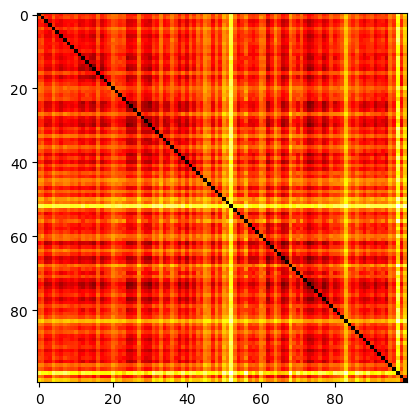

In [42]:
import torch
import torch.nn.functional as F

def cosine_distance_matrix(X):
    X_normalized = F.normalize(X, p=2, dim=1)
    cosine_similarity = torch.mm(X_normalized, X_normalized.t())
    return 1 - cosine_similarity


X_torch = torch.from_numpy(X)
distance = cosine_distance_matrix(X_torch).numpy()

plt.imshow(distance[:100,:100], cmap='hot', interpolation='nearest')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)

labels = clustering.labels_

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(Y[0],clustering.labels_)
print('Adjusted Rank Index',ari)


Adjusted Rank Index 0.3641418871623476


In [40]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
cos = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos(input1, input2)

In [41]:
output.shape

torch.Size([100])